### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
lista_edad_altura = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82)]

In [2]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
x=[]
y=[]
for value in lista_edad_altura:
    x.append(value[1])
    y.append(value[2])


In [4]:
x=np.array(x)
y=np.array(y)




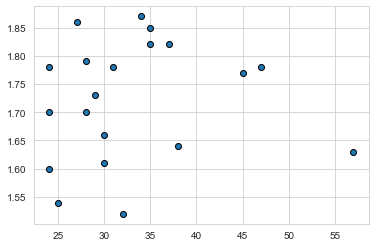

In [5]:
plt.scatter(x,y, edgecolor='black')


No es un bueno modelo porque los puntos no siguen ninguna relacion. 

In [6]:
x = x.reshape(-1, 1)



In [7]:
x.shape

(20, 1)

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [9]:
lin_reg = LinearRegression()



In [10]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [11]:
x_val = x_val.reshape(-1,1)
y_val = y_val.reshape(-1,1)


In [12]:
y_val_predict = lin_reg.predict(x_val)


In [13]:
y_val_predict

array([1.70980664, 1.83342894, 1.73188205, 1.71422172])

In [14]:
y_val

array([[1.73],
       [1.63],
       [1.87],
       [1.66]])

In [15]:
lista_dif=[]
for i,value in enumerate(y_val_predict):
    lista_dif.append(value-y_val[i])
    

In [16]:
lista_dif

[array([-0.02019336]),
 array([0.20342894]),
 array([-0.13811795]),
 array([0.05422172])]

In [17]:
print('MAE:', metrics.mean_absolute_error(y_val, y_val_predict))
print('MSE:', metrics.mean_squared_error(y_val, y_val_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_val_predict)))

MAE: 0.10399049307122149
MSE: 0.015951917148676442
RMSE: 0.12630089923938168


In [18]:
y

array([1.66, 1.87, 1.78, 1.6 , 1.79, 1.86, 1.54, 1.61, 1.52, 1.82, 1.77,
       1.7 , 1.78, 1.63, 1.73, 1.85, 1.78, 1.7 , 1.64, 1.82])

In [19]:
df=pd.DataFrame(x,y)

In [20]:
df.head()

,0
1.66,30
1.87,34
1.78,31
1.60,24
1.79,28


In [21]:
df.reset_index(inplace=True)

In [22]:
d={"index":"Altura",0:"Edad"}
df.rename(columns = d, inplace = True)


<AxesSubplot:>

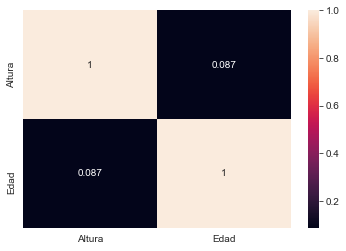

In [23]:
sns.heatmap(df.corr(), annot = True)

No están correlacionados

Las dispersiones serían dos veces mayores. Multiplicar el valor por 2 no implica un cambio con respecto